In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
import warnings
import warnings
warnings.filterwarnings('ignore')

E:\python\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
din=pd.read_csv("income.csv",na_values=" ?")

In [3]:
#Changing the column names
din.columns=["age","workclass","fnlwght","education","edu-num","maritalstatus","occupation","relationship","race","sex","capitalgain","capitalloss","hoursperweek","native-country","income"]

In [4]:
din.head()

,age,workclass,fnlwght,education,edu-num,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
din.dtypes

age                int64
workclass         object
fnlwght            int64
education         object
edu-num            int64
maritalstatus     object
occupation        object
relationship      object
race              object
sex               object
capitalgain        int64
capitalloss        int64
hoursperweek       int64
native-country    object
income            object
dtype: object

In [6]:
din.isnull().sum()

age                  0
workclass         1836
fnlwght              0
education            0
edu-num              0
maritalstatus        0
occupation        1843
relationship         0
race                 0
sex                  0
capitalgain          0
capitalloss          0
hoursperweek         0
native-country     583
income               0
dtype: int64

In [7]:
for col in din.columns:
    if din[col].isnull().sum()>0 and din[col].dtype==object:
        din[col].fillna(din[col].mode().values[0],inplace=True)
    

In [8]:
din.isnull().sum()

age               0
workclass         0
fnlwght           0
education         0
edu-num           0
maritalstatus     0
occupation        0
relationship      0
race              0
sex               0
capitalgain       0
capitalloss       0
hoursperweek      0
native-country    0
income            0
dtype: int64

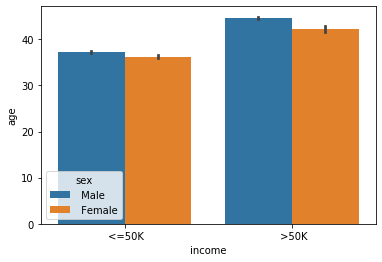

In [9]:
sns.barplot(x="income",y="age",hue="sex",data=din)

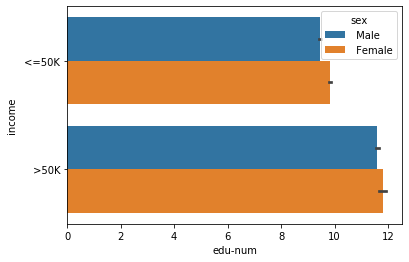

In [10]:
sns.barplot(x="edu-num",y="income",hue="sex",data=din)

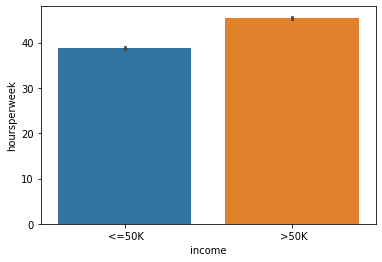

In [11]:
sns.barplot(x="income",y="hoursperweek",data=din)

In [12]:
din['relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [13]:
#As datatype is object we are using Label Encoder
le=LabelEncoder()
for col in din.columns:
    if din[col].dtype==object:
        din[col]=le.fit_transform(din[col])

In [14]:
din.head()

,age,workclass,fnlwght,education,edu-num,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


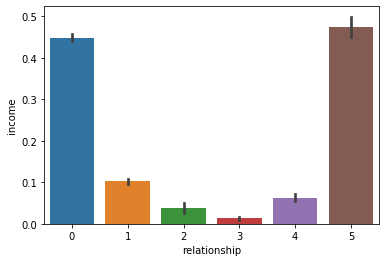

In [15]:
sns.barplot(x="relationship",y="income",data=din)

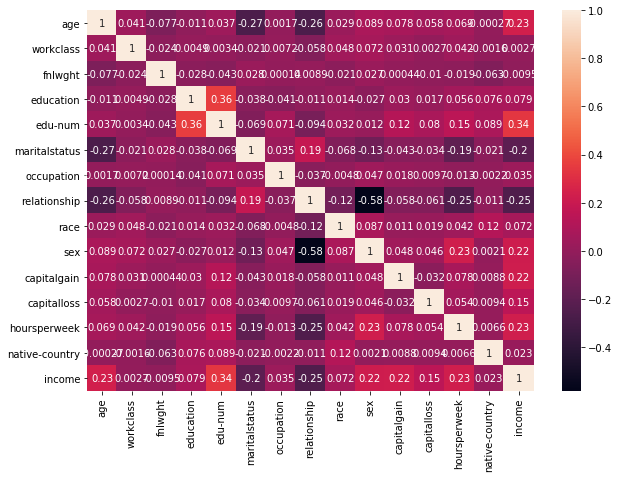

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(din.corr(),annot=True)

In [18]:
din.drop('education',axis=1,inplace=True)

In [19]:
din.skew()

age                0.558738
workclass          0.076178
fnlwght            1.446972
edu-num           -0.311630
maritalstatus     -0.013448
occupation         0.000536
relationship       0.786784
race              -2.435332
sex               -0.719244
capitalgain       11.953690
capitalloss        4.594549
hoursperweek       0.227636
native-country    -4.243083
income             1.212383
dtype: float64

In [20]:
x=din.iloc[:,:-1]
x

,age,workclass,fnlwght,edu-num,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country
0,50,5,83311,13,2,3,0,4,1,0,0,13,38
1,38,3,215646,9,0,5,1,4,1,0,0,40,38
2,53,3,234721,7,2,5,0,2,1,0,0,40,38
3,28,3,338409,13,2,9,5,2,0,0,0,40,4
4,37,3,284582,14,2,3,5,4,0,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,12,2,12,5,4,0,0,0,38,38
32556,40,3,154374,9,2,6,0,4,1,0,0,40,38
32557,58,3,151910,9,6,0,4,4,0,0,0,40,38
32558,22,3,201490,9,4,0,3,4,1,0,0,20,38


In [21]:
#using standard scaler technique
scale=StandardScaler()
x=scale.fit_transform(x)

In [22]:
y=din.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: income, Length: 32560, dtype: int32

In [23]:
max_acc_score=0
for r_state in range(40,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    y_pred=lg.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print("accuracy_score:",r_state,"is",acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
        
print(final_r_state)
print(max_acc_score)

accuracy_score: 40 is 0.8277027027027027
accuracy_score: 41 is 0.8230958230958231
accuracy_score: 42 is 0.8215601965601965
accuracy_score: 43 is 0.8273955773955773
accuracy_score: 44 is 0.8221744471744472
accuracy_score: 45 is 0.8277027027027027
accuracy_score: 46 is 0.8167997542997543
accuracy_score: 47 is 0.8293918918918919
accuracy_score: 48 is 0.8217137592137592
accuracy_score: 49 is 0.8252457002457002
accuracy_score: 50 is 0.8243243243243243
accuracy_score: 51 is 0.8195638820638821
accuracy_score: 52 is 0.8255528255528255
accuracy_score: 53 is 0.8281633906633906
accuracy_score: 54 is 0.8238636363636364
accuracy_score: 55 is 0.8260135135135135
accuracy_score: 56 is 0.8316953316953317
accuracy_score: 57 is 0.824017199017199
accuracy_score: 58 is 0.8158783783783784
accuracy_score: 59 is 0.8246314496314496
accuracy_score: 60 is 0.8260135135135135
accuracy_score: 61 is 0.8232493857493858
accuracy_score: 62 is 0.8203316953316954
accuracy_score: 63 is 0.8235565110565111
accuracy_score: 6

In [24]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=83,test_size=0.2)

In [25]:
KNN=KNeighborsClassifier(n_neighbors=6)
svc=SVC()
lr=LogisticRegression()
dtc=DecisionTreeClassifier(random_state=6)
gnb=GaussianNB()
rf=RandomForestClassifier(n_estimators=100,random_state=83)
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dtc))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rf))

In [26]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('*************************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("roc auc score=",roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
  


************************* KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


accuracy_score= 0.8432125307125307


Cross_val_score= 0.8332002457002456


roc auc score= 0.7334310466582762


Classification report
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      4977
           1       0.73      0.53      0.61      1535

    accuracy                           0.84      6512
   macro avg       0.80      0.73      0.76      6512
weighted avg       0.83      0.84      0.83      6512



[[4684  293]
 [ 728  807]]


************************* SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, rando

In [27]:
#Checking all classifiers cross val score and roc_auc_score
result=pd.DataFrame({'Model': Model, 'Accuracy_score':score,'Cross_val_score':cvs,'Roc_auc_score':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_score
0,KNeighborsClassifier,84.321253,83.320025,73.343105
1,SVC,85.687961,84.812654,75.363571
2,LogisticRegression,83.522727,82.475430,71.153698
3,DecisionTreeClassifier,81.127150,81.357494,75.060569
4,GaussianNB,80.820025,80.304054,64.497189
5,RandomForestClassifier,86.179361,85.832310,78.545989


In [28]:
joblib.dump(rf,'Model_income.csv')

['Model_income.csv']

In [29]:
model=joblib.load('Model_income.csv')
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Conclusion:
#As there are missing values with ? in the dataset, i have used na_values in reading csv.  for null values i have used column mode to fill the data as columns are with object datatype
#When checking for barplot i have observed incoming is increasing for male and female same observed with edu-numand hours per week they are positively correlating
#After using label encoder both education and edu-num doesn't make much difference i have dropped education since its not much correlating with target
#It is always good to input Standard scaled data to the model  i have used standard scaling technique to the data
#As per analysis of models, RandomForestClassifier is the best model for this dataset as it having high accuracy score and cross val score and roc_auc_score